<a href="https://colab.research.google.com/github/skadiddles/CCADMACL_EXERCISES_COM231/blob/main/exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [107]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [108]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [109]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [110]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [111]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [112]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [113]:
print(df.isnull().sum())

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [114]:
ndf = df[['AnnualIncome','SpendingScore']].copy()

Display the first 10 rows. `(5 pts)`

In [115]:
ndf.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

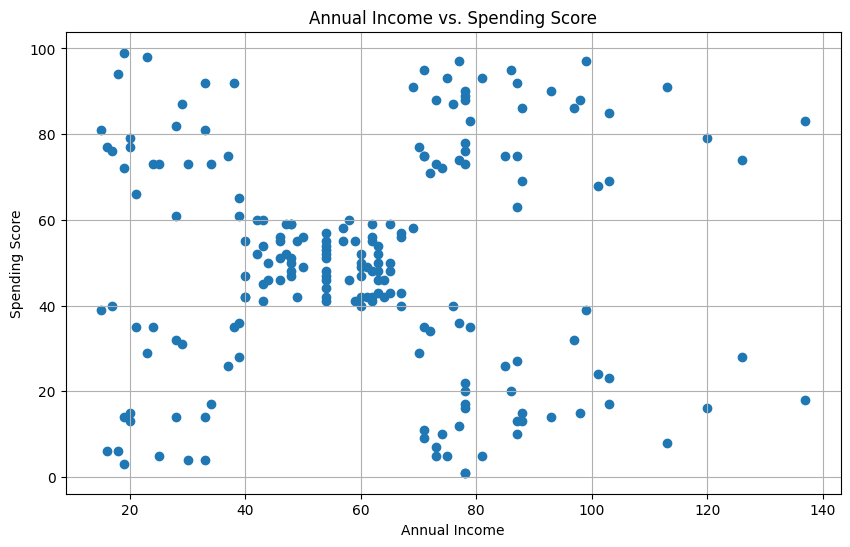

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(ndf['AnnualIncome'], ndf['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs. Spending Score')
plt.grid(True)
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

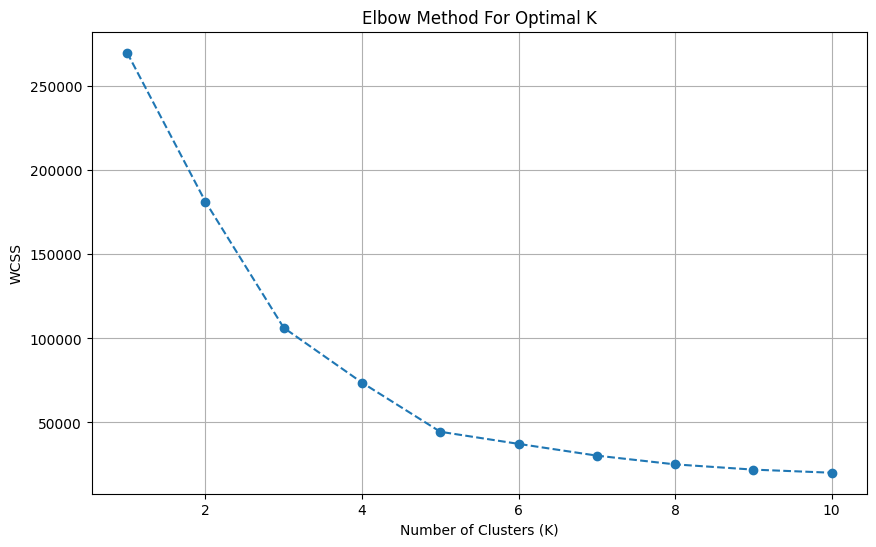

In [117]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(ndf)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [118]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
ndf['Cluster'] = kmeans.fit_predict(ndf)

ndf.head(10)

,AnnualIncome,SpendingScore,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

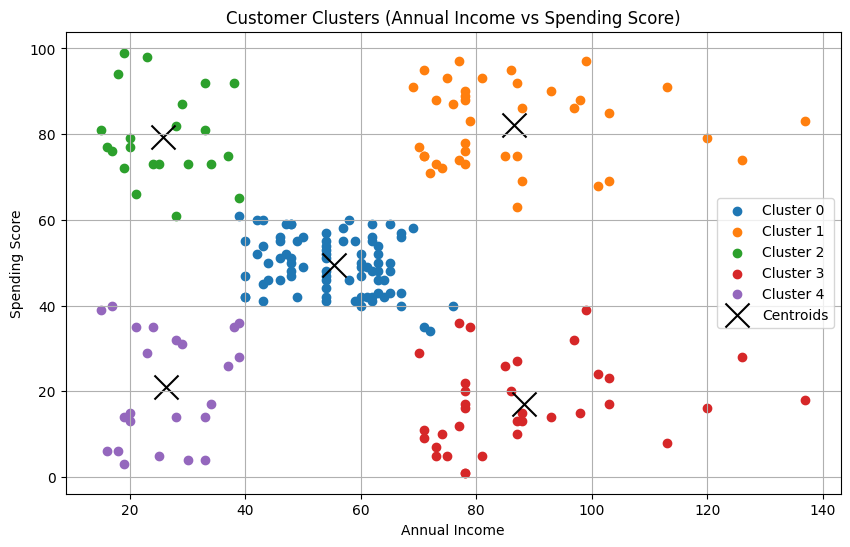

In [119]:
plt.figure(figsize=(10, 6))

for i in range(optimal_k):
    plt.scatter(
        ndf[ndf['Cluster'] == i]['AnnualIncome'],
        ndf[ndf['Cluster'] == i]['SpendingScore'],
        label=f'Cluster {i}'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='black',
    marker='x',
    label='Centroids'
)

plt.title('Customer Clusters (Annual Income vs Spending Score)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

Which cluster represents high income, low spending users?
  - Cluster 3

Which cluster represents low income, high spending users?
  - Cluster 2

Which cluster might represent target customers for promotions?
  - Cluster 1
  
What business insights can you derive from the clusters?
  - Cluster 1 are target customers for promotions. as they are high income, high spending users.
    Cluster 2 are low income, high spending users.
    Cluster 3 are high income, low spending users.
    Cluster 4 are low income, low spending users.
    Cluster 0 are mid income, mid spending users.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [120]:
undf = df[['AnnualIncome','SpendingScore','Age']].copy()

Visualize using a 3D scatter plot. `(5 pts)`

In [124]:
cluster_Kmeans = KMeans(n_clusters=5)

model_kmeans = cluster_Kmeans.fit(undf)

pred_kmeans = model_kmeans.labels_

print(pred_kmeans)


fig = px.scatter_3d(df, x='Age', y='AnnualIncome', z='SpendingScore', color=pred_kmeans)
fig.show()


[4 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 2 0 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

Are there meaningful and distinguishable clusters?
  - The new scatter 3d plot has no new distinguishable cluster. It is almost the same as the 2d plot (AnnualIncome and SpendingScore)

What business insights can you derive from the clusters in 3D??
  - in Cluster 0 (mid income, mid spending users), any age can be there as you per the scatter plot.
  - in Cluster 1, usually the ages 30-40s are the high income, high spending users. They can be used for promotion of luxury and high-end deals
  - in Cluster 2, usually the ages 20-30s are the low income, high spending users. They can be used for promotion of sales (EX: Buy 1, Take 1 deals)
  - in Cluster 3, usually the elderly people (ages 35-70s) are the high income, low spending users. Not suited for promotions as they are low spenders.
  - in Cluster 4 has the similarity in Cluster 3. Also not suited for low spenders.